In [1]:
import numpy as np
import matplotlib.pyplot as plt

Find the minimum of $y = x^2 +2x + 5$, where $x \in [-6,4]$

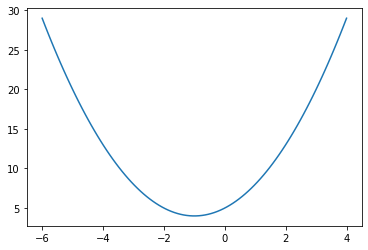

In [2]:
X = np.linspace(-6,4,100)
y = X**2 + 2*X +5
plt.plot(X,y)

Initialize X and $\alpha$  
We have $y' = 2X +2$

In [13]:
import random
X = random.random()
alpha = 0.5
iteraterNum = 100 

In [14]:
for i in range(iteraterNum):
    X = X - alpha*(2*X+2)

In [15]:
X

-1.0

------ 



Use gradient descent to solve linear regression problem.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def loadData():
    data = np.loadtxt('data/data1.txt',delimiter = ',')
    n = data.shape[1]-1 #feature number 
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

![](data/gradient.png)

In [7]:
#define gradient descent method
def gradientdst(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()# this is all x0 = 1
    X = np.insert(X,0,values = c, axis = 1) #insert a col at position 0, this col is all the x0 = 1
    m = X.shape[0]
    n = X.shape[1]
    
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j] + (alpha/m)*(np.sum((y-np.dot(X, theta)*X[:,j].reshape(-1,1))))
    return theta

In [ ]:
# prediction

In [12]:
X,y = loadData()
theta = np.zeros(X.shape[1]+1).reshape(-1,1) #add x0 col
iterations = 500
alpha = 0.01 
theta = gradientdst(X,y,theta,iterations,alpha)
print(theta)

[[17.23748963]
 [-1.65564325]]


Draw the original scattered data points, and the resulted line 

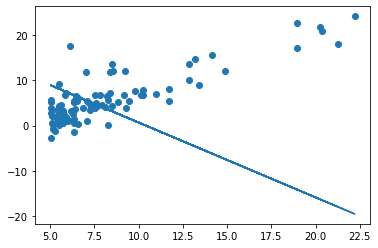

In [13]:
plt.scatter(X,y)
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)

### What's the problem here?

When the range of the data is quite large, the result is not ideal.  
Need to do NORMALIZATION here.

In [14]:
def featureNormalize(X):
    mu = np.average(X,axis = 0)
    sigma = np.std(X,axis = 0, ddof = 1) 
    X = (X-mu)/sigma
    return X, mu, sigma

In [15]:
X,y = loadData()
X, mu, sigma = featureNormalize(X)
theta = np.zeros(X.shape[1]+1).reshape(-1,1) #add x0 col
iterations = 500
alpha = 0.01 
theta = gradientdst(X,y,theta,iterations,alpha)
print(theta)

[[5.80076911]
 [5.85912202]]


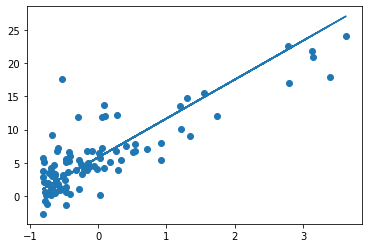

In [16]:
plt.scatter(X,y)
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)

the plot looks normal now.  
Now we want to plot the cost.


In [68]:
def cost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power((np.dot(X,theta) - y),2))/(2*m)

In [69]:
#define gradient descent method with cost function
def gradientdst(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()# this is all x0 = 1
    X = np.insert(X,0,values = c, axis = 1) #insert a col at position 0, this col is all the x0 = 1
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j] + (alpha/m)*(np.sum((y-np.dot(X, theta))*X[:,j].reshape(-1,1)))
        costs[num] = cost(X,y,theta)
    return theta, costs

In [70]:
X_origin,y = loadData()
X, mu, sigma = featureNormalize(X_origin)
theta = np.zeros(X.shape[1]+1).reshape(-1,1) #add x0 col
iterations = 500
alpha = 0.01 
theta,costs = gradientdst(X,y,theta,iterations,alpha)
print(theta)

[[5.80076911]
 [4.58494475]]


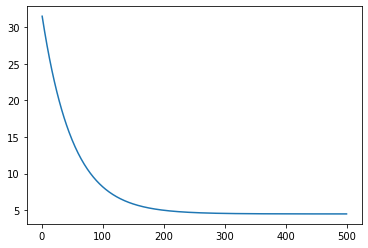

In [71]:
x_axis = np.linspace(1,iterations,iterations)# from 1 to iterations, repeat iteration times
plt.plot(x_axis,costs)

### Work on the predictions:


In [28]:
def predict(X):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()# this is all x0 = 1
    X = np.insert(X,0,values = c, axis = 1) 
    return np.dot(X,theta)

In [30]:
predict([[7.3]])

array([[4.49900562]])

### Model Evaluation:
1. MSE
2. RMSE
3. MAE

#### MSE

In [31]:
y_true = np.array([1,2,3,4,5])
y_pred = np.array([1.1,2.2,3.3,4.1,5])

In [47]:
def mse(y_true,y_pred):
    return np.sum(np.power(y_true - y_pred,2))/len(y_true)
mse(y_true,y_pred)

0.02999999999999998

#### RMSE

In [39]:
def rmse(y_true,y_pred):
    return np.sqrt(np.sum(np.power(y_true - y_pred,2))/len(y_true))
rmse(y_true,y_pred)

0.17320508075688767

#### MAE

In [40]:
def mae(y_true,y_pred):
    return np.sum(np.abs(y_true - y_pred))/len(y_true)
mae(y_true,y_pred)

0.13999999999999996

### Model evaluation to the linear regression model we have


In [43]:
model_pred = predict(X_origin )

In [48]:
mse(y,model_pred)

10.482618773874892

In [46]:
rmse(y,model_pred)

3.2376872569590307

In [49]:
mae(y,model_pred)

2.335578299048643

### Solve ridge regression with l2 norm regularization 

In [59]:
def gradientDst_ridge(X,y,theta, iterations,alpha, lmd = 0.02):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values = c, axis = 1)
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j] + (alpha/m)*np.sum((y-np.dot(X,theta))*(X[:,j].reshape(-1,1))) - 2*lmd*theta[j]
    costs[num] = cost(X,y,theta)
    return theta, costs


In [61]:
X_origin, y = loadData()
X, mu, sigma = featureNormalize(X_origin)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 350
alpha = 0.01 

In [76]:
theta, costs = gradientDst_ridge(X,y,theta, iterations, alpha,0.01)


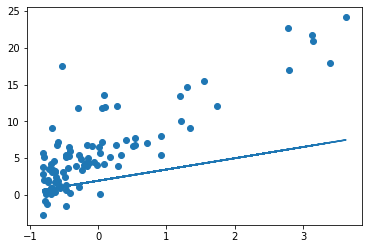

In [77]:
# plot the scatter points

plt.scatter(X,y) #use normalized X, because the theta is calculated by the normalized data
h_theta = theta[0] + theta[1]*X
plt.plot(X,h_theta)

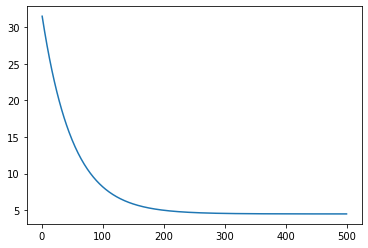

In [72]:
# plot cost function 
x_axis = np.linspace(1,iterations,iterations)
plt.plot(x_axis, costs)